# Plotting and statistical packages 

 - Matplotlib / Seaborn 
 - pandas
 - statsmodels

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.datasets import load_boston

import statsmodels.api as sm
from statsmodels.formula.api import ols

sns.set()

/Users/jbw/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Boston housing prices

In [2]:
# scikit-learn dataset
df_dict = load_boston()
print df_dict["DESCR"]

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
features = pd.DataFrame(data=df_dict.data, columns = df_dict.feature_names)
target = pd.DataFrame(data=df_dict.target, columns = ['MEDV'])

In [5]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [6]:
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [10]:
df = pd.concat([features, target], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
for column in df.columns:
    print column, df[column].nunique()

CRIM 504
ZN 26
INDUS 76
CHAS 2
NOX 81
RM 446
AGE 356
DIS 412
RAD 9
TAX 66
PTRATIO 46
B 357
LSTAT 455
MEDV 229


## Pandas plotting 

In [12]:
from pandas.tools.plotting import scatter_matrix

/Users/jbw/anaconda/lib/python2.7/site-packages/pandas/tools/plotting.py:3303: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  "is being cleared", UserWarning)


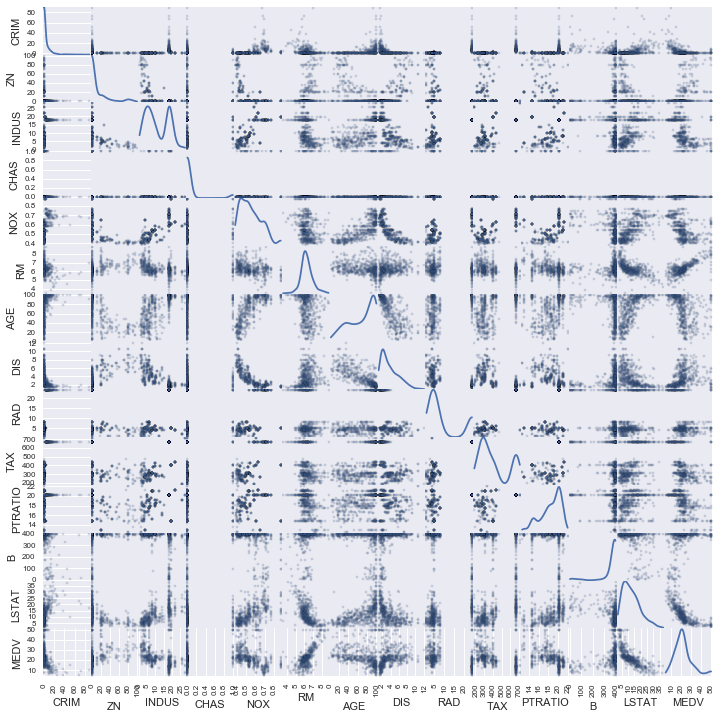

In [13]:
fig, ax = plt.subplots(figsize=(12, 12))
scatter_matrix(df, alpha=0.2, diagonal='kde', ax=ax);

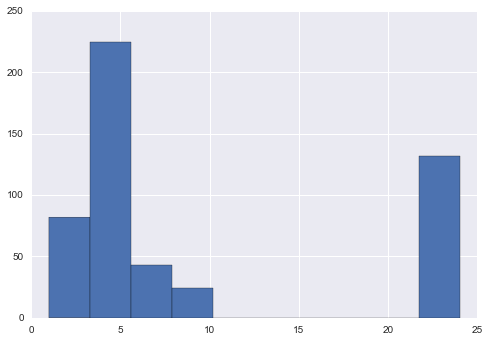

In [15]:
df['RAD'].hist()

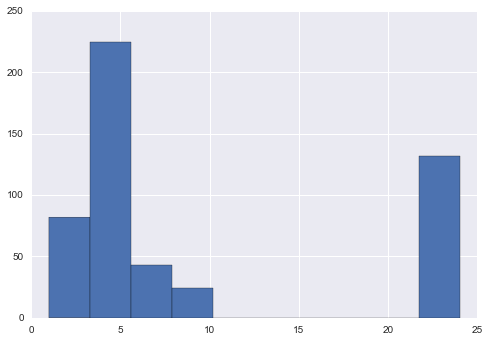

In [16]:
df.RAD.hist()

In [20]:
df['RAD_bool'] = df['RAD'].apply(lambda x: x > 15).astype('bool')

In [21]:
type(df['RAD_bool'].iloc[0])

numpy.bool_

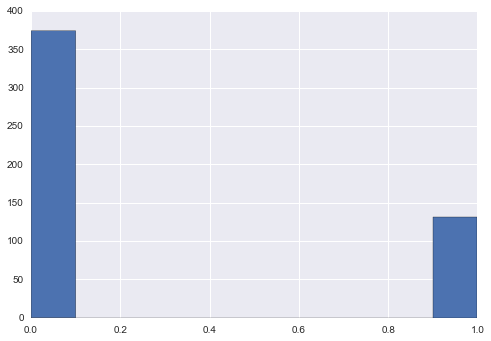

In [22]:
df['RAD_bool'].hist()

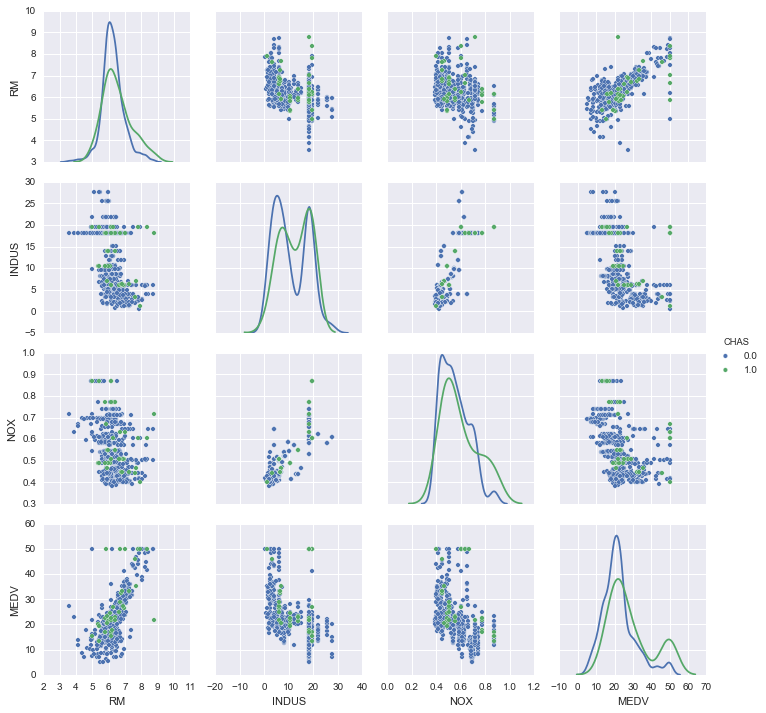

In [25]:
sns.pairplot(df, hue="CHAS", vars=['RM', 'INDUS', 'NOX', 'MEDV'], diag_kind='kde')

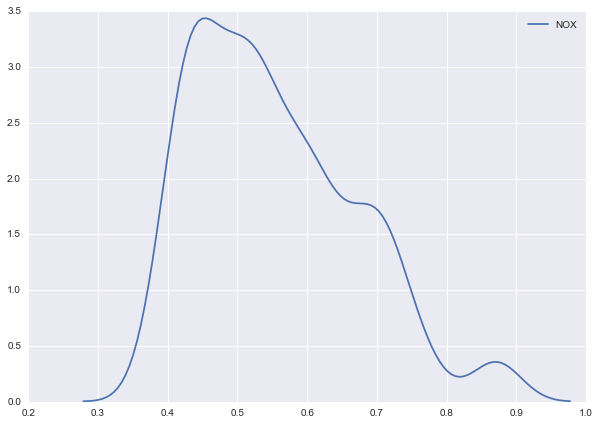

In [27]:
fig, ax = plt.subplots(figsize=(10,7))
sns.kdeplot(df.NOX)

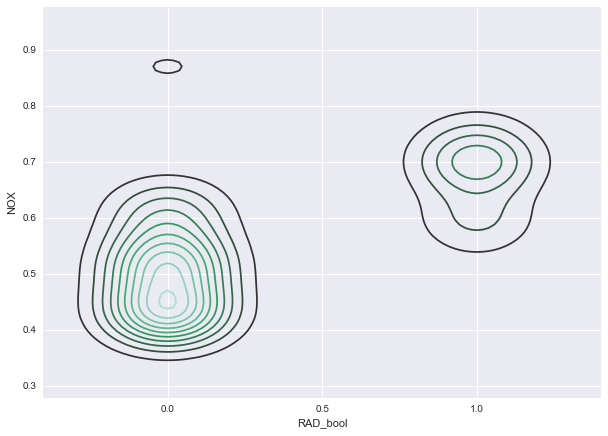

In [28]:
fig, ax = plt.subplots(figsize=(10,7))
sns.kdeplot(df.RAD_bool, df.NOX, ax=ax)

# Pandas plotting 

In [29]:
from pandas.tools.plotting import andrews_curves
# https://en.wikipedia.org/wiki/Andrews_plot

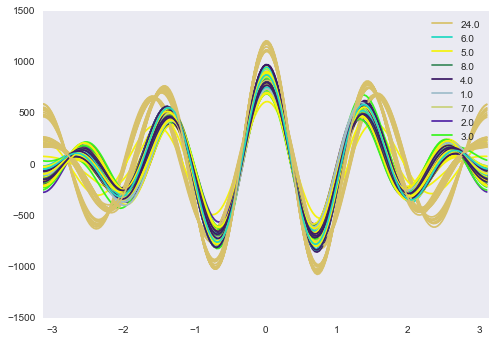

In [33]:
andrews_curves(df.sample(100), 'RAD')

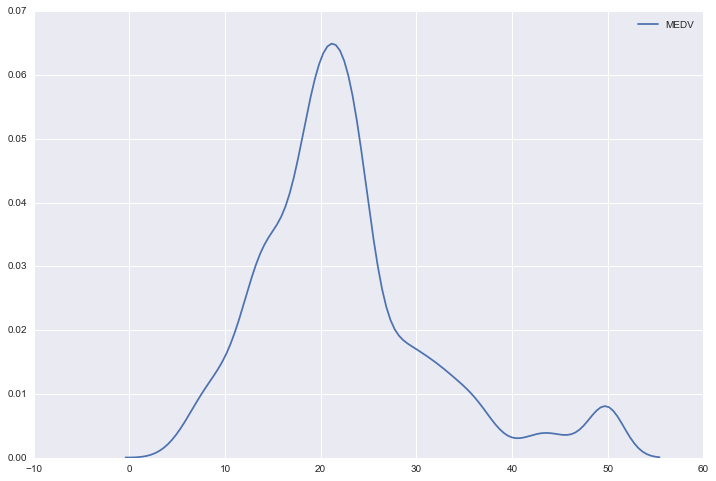

In [34]:
fig, ax = plt.subplots(figsize=(12,8))
sns.kdeplot(target.MEDV, ax=ax, )

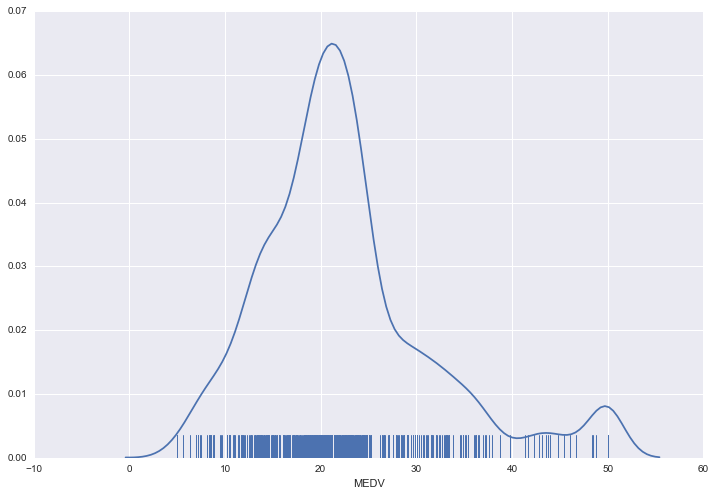

In [35]:
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(target.MEDV, ax=ax, rug=True, hist=False)

In [ ]:
features.columns

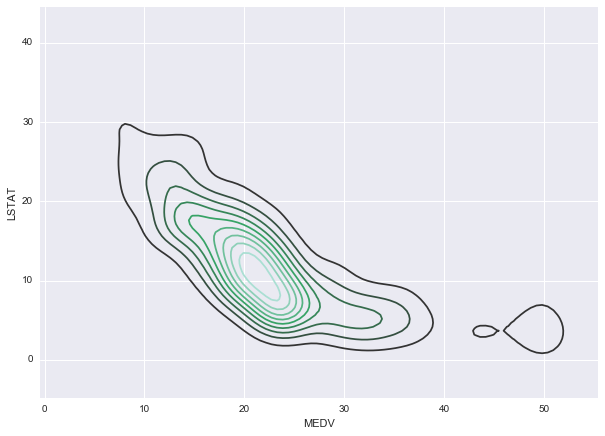

In [36]:
fig, ax = plt.subplots(figsize=(10,7))
sns.kdeplot(df.MEDV, df.LSTAT, ax=ax)